## 參考連結

1. [HeapSort](https://www.youtube.com/watch?v=MtQL_ll5KhQ)
2. [Heap sort in 4 minutes](https://www.youtube.com/watch?v=2DmK_H7IdTo)
3. [Comparison Sort: Heap Sort(堆積排序法)](http://alrightchiu.github.io/SecondRound/comparison-sort-heap-sortdui-ji-pai-xu-fa.html)

## Heap Sort Introduction

&emsp; Heap Sort被稱為堆積排序法，此處為Binary Heap(二元堆積法)的結構。


## What is Binary Heap?

1. Binary Heap的結構是按照順序依次填入的，可以把Node想像成爸爸生的小孩，越大的小孩越早有小孩，因此Binary Heap的堆會由左至右排列，不會右邊的有Node而左邊沒有。
    + 數值1-9，按照Binary Heap的結構填入，可以填滿位置0-8，以index[0]-index[8]表示。
    + 優點是方便尋找「parent和child」，以index[i]的Node為例:
        + 其left-child為index[2i+1]
        + 其right-child為index[2i+2]
        + 其parent為index[i/2-1]


2. 每一個Node(index[i])都被視為小堆的Top(頂端Node)，那麼可將此Binary Heap分為兩類：
    + Max Heap：在每一個小堆中，Top之「數值」要比兩個child之「數值」還要**大**。
    + Min Heap：在每一個小堆中，Top之「數值」要比兩個child之「數值」還要**小**。



## 流程圖

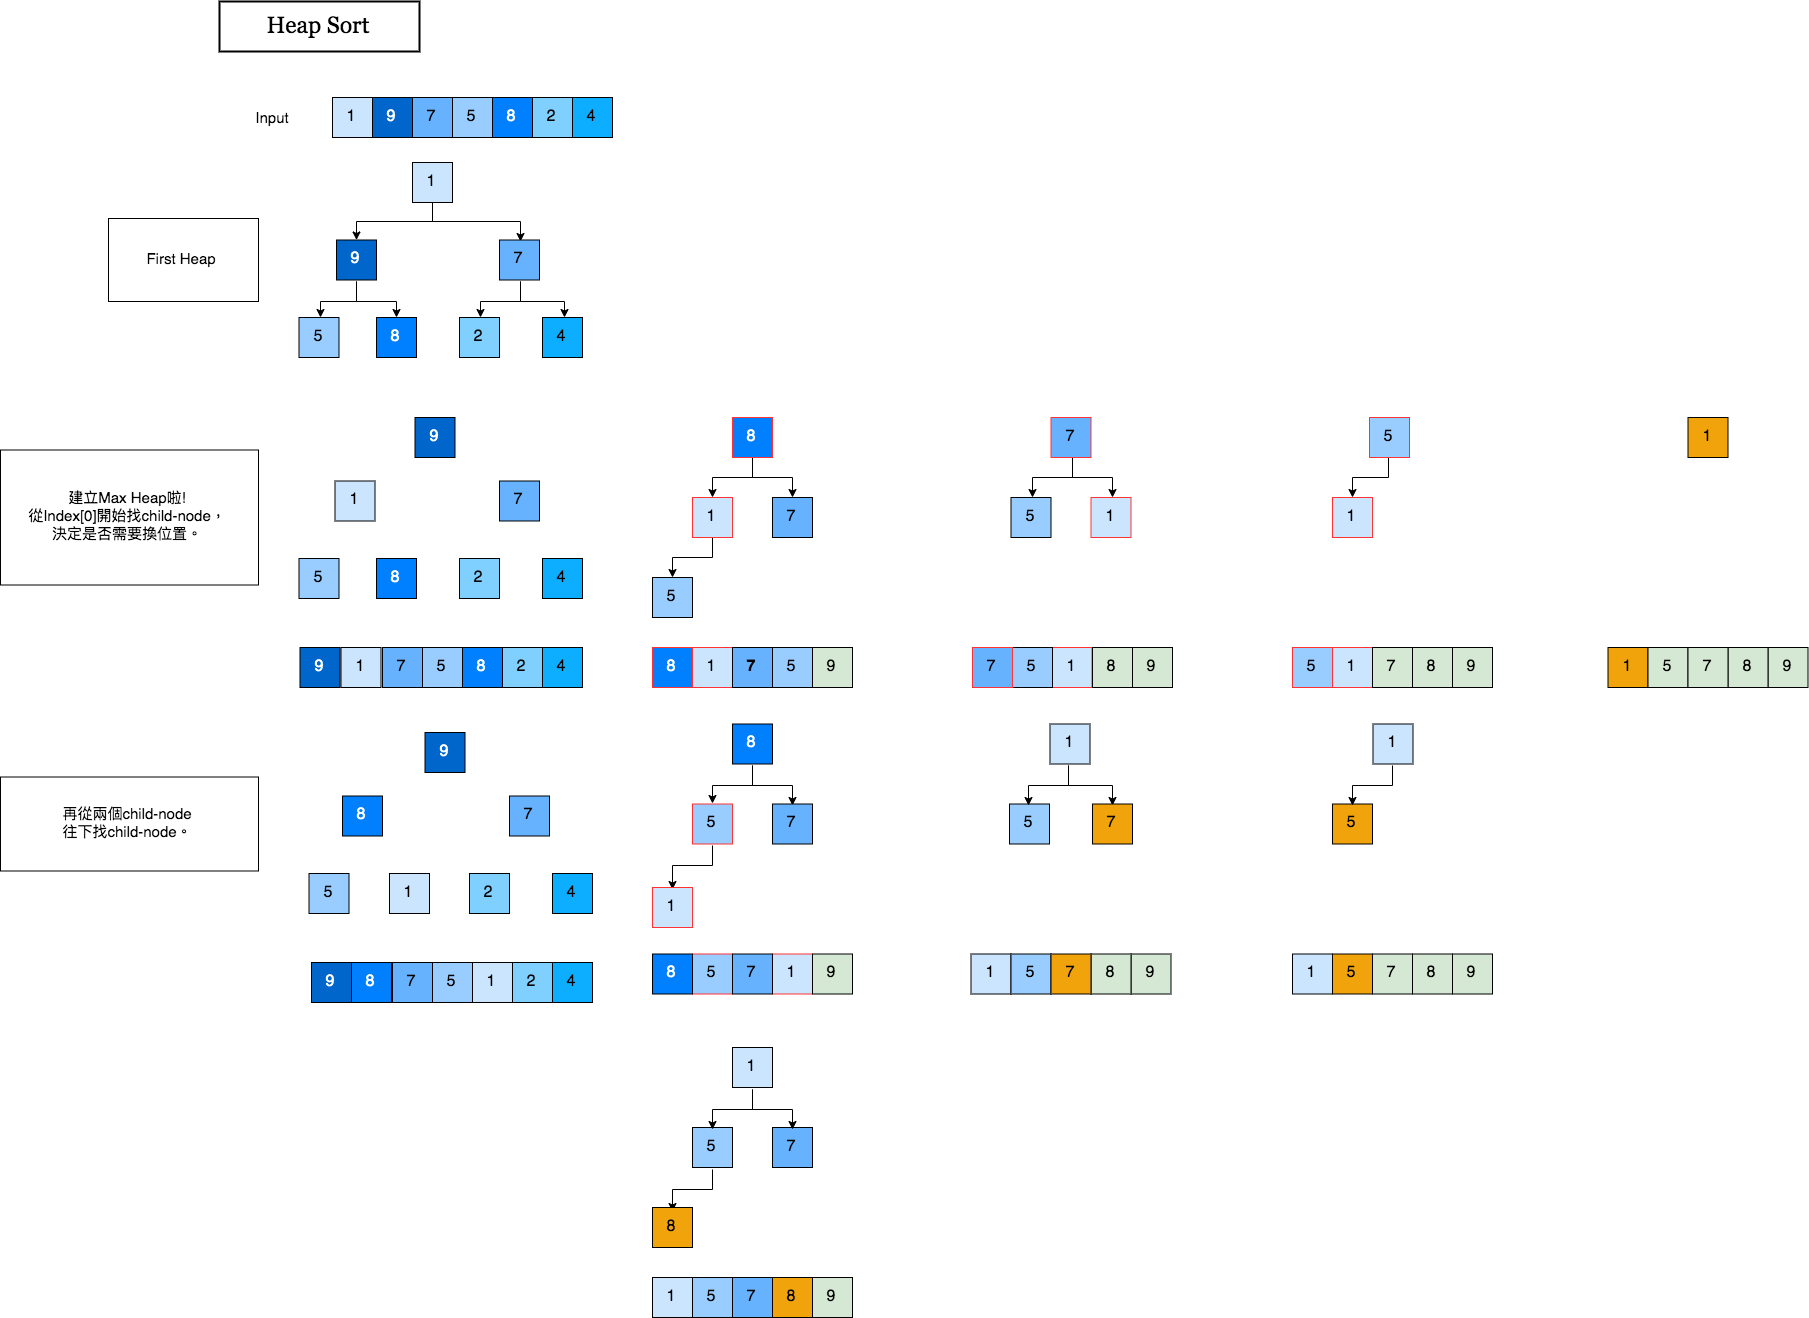

In [1]:
from IPython.display import Image
Image(filename = "HeapSort.png", height = 500, width = 1000)

## 我對Heap Sort的想法：

看完 [HeapSort](https://www.youtube.com/watch?v=MtQL_ll5KhQ) 這個影片，我歸納Heap Sort大概是以下幾個步驟：

1. 從0開始，建立Max Heap。

2. 建立Max Heap，由上而下(Index[0]開始)，確認每一層的父節點的值大於子節點，若父節點的值小於子節點則交換位置，繼續下一層的確認。

3. 當每一個父節點的值都比子節點大時，即停止尋找，Heap最上面的值為整個Heap的最大值且為Index[0]，將Heap中的Index[0]和Index[last] (最後一個Heap的點)交換，並刪除掉Index[last] (此時已經被換成最大值了)，待排序的heapsize要-1。

4. 重複以上2.3步驟，直到Heap待排序的元素只剩一個即停止。


## Pseudocode加深理解

[Heap sort in 4 minutes](https://www.youtube.com/watch?v=2DmK_H7IdTo)


## 我對pseudocode的觀察：

1. 可以看到pseudocode將HeapSort分為三個部分，分別是：
    + HeapSort：主程式，用來Run整個HeapSort的流程。
    + BuildMaxHeap：建立第一個Heap
    + Heapify：將Heap排序，當父節點小於子節點時，把較大的子節點Index以Max記錄下來，當Max不為i時，即交換Node，且下一次從Max開始Heapify
   
   
2. Heapify是先拿i和left比，比較大的記錄下來，再拿大的和right比，比較大的紀錄下來，這跟我原本的想法不太一樣，就是我原本是想同時比，但是我這樣子寫的話就不夠簡潔。

## 程式碼

### 第一步：Build Max Heap

1. BuildMaxHeap類似於Heapify，但是處理的是完全未經排序的array，上述參考的pseudocode是由array的後面檢查回來(Sift-Up)，交換Node後，最大的Node會留在Heap最上面，***我試著由前往後檢查array，所以試了由前往後的寫法，但是由前往後試過發現不成功。***


2. BuildMaxHeap在進行Heapify的時候要檢查的child-node的root只有n//2個，不然會多檢查好幾次浪費時間。

In [5]:
# 實驗一：pseudocode的版本，BuildMaxHeap 由後往前 Heapify
def HeapSort(array):
    length = len(array)
    BuildMaxHeap(array, length)
    return array

def BuildMaxHeap(array, length): 
    for j in range(length//2 + 1):
        i = length//2 - j        # 由後往前 Heapify
        Heapify(array, i, length)

def Heapify(array, i, length):
    left = 2 * i + 1
    right = 2 * i + 2

    if left <= length - 1 and array[left] > array[i]: # 比較時先和左邊child-node比較，並且把比較大的紀錄下來，再去和右邊child-node比較
        Max = left
    else:
        Max = i
    if right <= length - 1 and array[right] > array[Max]: 
        Max = right
    if Max != i:                                     # 當發現最大值不是parent-node時，就將最大的child-node和parent-node位置交換。
        array[i], array[Max] = array[Max], array[i]  
        Heapify(array, Max, length)                  # 從原本最大值Node的index，開始繼續向下排序。

a = [3,2,1,5,6,4]
HeapSort(a)

[6, 5, 4, 3, 2, 1]

In [6]:
# 實驗二：我自己流程圖的版本，BuildMaxHeap 由前往後 Heapify
def HeapSort(array):
    length = len(array)
    BuildMaxHeap(array, length)
    return array

def BuildMaxHeap(array, length): 
    for j in range(length//2 + 1): # 由前往後 Heapify
        Heapify(array, j, length)

def Heapify(array, i, length):
    left = 2 * i + 1
    right = 2 * i + 2

    if left <= length - 1 and array[left] > array[i]: # 比較時先和左邊child-node比較，並且把比較大的紀錄下來，再去和右邊child-node比較
        Max = left
    else:
        Max = i
    if right <= length - 1 and array[right] > array[Max]:
        Max = right
    if Max != i:                                      # 當發現最大值不是parent-node時，就將最大的child-node和parent-node位置交換。
        array[i], array[Max] = array[Max], array[i]
        Heapify(array, Max, length)                   # 從原本最大值Node的index，開始繼續向下排序。

a = [3,2,1,5,6,4]
HeapSort(a)

[3, 6, 4, 5, 2, 1]

### 第二步：Change largest item and Remove last item in heap

1. 在BuildMaxHeap後，要把array[0]和array[heaplast]對調，且heapsize要減1，表示在heap中刪掉最大的數。

### 第三步：Keep Heapify

1. 在對調完位置後，heap剩下(heapsize - 1)個Node，Heapify由再由0開始，依次向後比對父節點和子結點(Sift-down)。

### Notice

1. heapsize每交換一次就就要減1，需要輸入到下一次Heapify的heapsize，這裡我用了兩種方法，一種是用class包起來，一種是多增加heapsize的參數。

2. heaplast指的是heap中的最後一個數的Index，而heapsize指的是heap的個數。
    + 由於包在迴圈內，heaplast最開始要用len(array)來扣，不能用self.heapsize，如果用self.heapsize隨著for迴圈會不斷覆蓋掉。
    + 而heapsize也由原本len(array)的長度隨著每交換1次Node而扣1。 

In [7]:
class HeapSort:
    def __init__(self, array):
        if type(array) is list:
            self.array = array
            self.heapsize = len(array)
    
    def run(self):
        self.BuildMaxHeap(self.array)
        for i in range(len(self.array) - 1):
            heaplast = (len(self.array) - 1) - i # 一開始要用len(array)長度來扣，不然用heapsize的話會不斷被覆寫
            self.array[0], self.array[heaplast] = self.array[heaplast], self.array[0]
            self.heapsize = self.heapsize - 1
            self.Heapify(self.array,0)
        return self.array
    
    def BuildMaxHeap(self, array): 
        n = self.heapsize
        for j in range(n//2 + 1):
            i = n//2 - j        # 由後往前 Heapify
            self.Heapify(self.array, i)

    def Heapify(self, array, i):
        left = 2 * i + 1
        right = 2 * i + 2
        
        if left <= self.heapsize - 1 and self.array[left] > self.array[i]: 
            Max = left
        else:
            Max = i
        if right <= self.heapsize - 1 and self.array[right] > self.array[Max]:
            Max = right
        if Max != i:
            self.array[i], self.array[Max] = self.array[Max], self.array[i]
            self.Heapify(self.array, Max)

a = [3,2,1,5,6,4]
b = HeapSort(a)
b.run()

[1, 2, 3, 4, 5, 6]

In [8]:
def HeapSort(array):
    heapsize = len(array)
    BuildMaxHeap(array, heapsize)
    for i in range(len(array) - 1):
        heaplast = (len(array) - 1) - i
        array[0], array[heaplast] = array[heaplast], array[0]
        heapsize = heapsize - 1
        Heapify(array,0, heapsize)
    return array

def BuildMaxHeap(array, heapsize): 
    for j in range(heapsize//2 + 1):
        i = heapsize//2 - j        # 由後往前 Heapify
        Heapify(array, i, heapsize)

def Heapify(array, i, heapsize):
    left = 2 * i + 1
    right = 2 * i + 2

    if left <= heapsize - 1 and array[left] > array[i]:
        Max = left
    else:
        Max = i
    if right <= heapsize - 1 and array[right] > array[Max]:
        Max = right
    if Max != i:
        array[i], array[Max] = array[Max], array[i]
        Heapify(array, Max, heapsize)

a = [3,2,1,5,6,4]
HeapSort(a)

[1, 2, 3, 4, 5, 6]

### 最後：寫成Class

In [9]:
class Solution(object):
    def heap_sort(self, nums):
        self.array = nums
        self.heapsize = len(nums)
        self.BuildMaxHeap(self.array)
        for i in range(len(self.array) - 1):
            heaplast = (len(self.array) - 1) - i
            self.array[0], self.array[heaplast] = self.array[heaplast], self.array[0]
            self.heapsize = self.heapsize - 1
            self.Heapify(self.array,0)
        return self.array

    def BuildMaxHeap(self, array): 
        n = self.heapsize
        for j in range(n//2 + 1):
            i = n//2 - j        
            self.Heapify(self.array, i)

    def Heapify(self, array, i):
        left = 2 * i + 1
        right = 2 * i + 2

        if left <= self.heapsize - 1 and self.array[left] > self.array[i]:
            Max = left
        else:
            Max = i
        if right <= self.heapsize - 1 and self.array[right] > self.array[Max]:
            Max = right
        if Max != i:
            self.array[i], self.array[Max] = self.array[Max], self.array[i]
            self.Heapify(self.array, Max)

### 時間複雜度(Time Complexity)

Best Case：Ο(n log n)

Worst Case：Ο(n log n)

Average Case：Ο(n log n)